In [1]:
#################################################################################################
## Import Section & Session creation

from data_session import Session
import numpy as np
import matplotlib.pyplot as plt
from multiple_sessions import *


file_name = 'V1_SESSION_B20141210_1.mat'

s1 = Session(file_name,normalized=True)
#sm = MultipleSessions("V1",normalized=True,monkey='B')


/Users/ulysseklatzmann/courses/vanvugt_data/abstract_session.py:224: RuntimeWarning:

Mean of empty slice

/Users/ulysseklatzmann/courses/vanvugt_data/abstract_session.py:231: RuntimeWarning:

Mean of empty slice



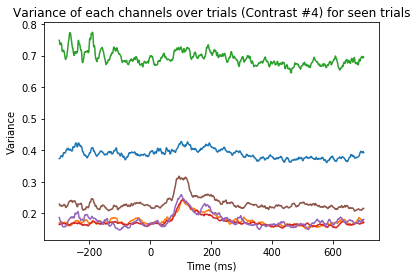

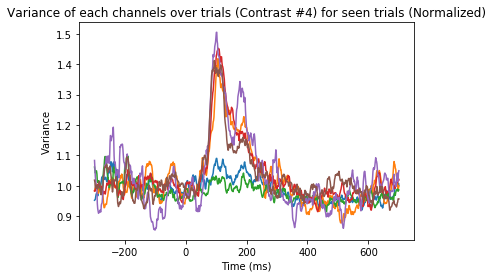

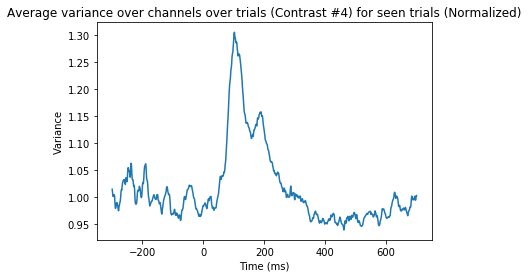

In [3]:
#################################################################################################
## Single session exploration
## Contrast #4 is providing the best Accuracy

b = s1.plot_figure_5("seen",3,ao_channels=False,smooth=10,baseline=False,title="Variance of each channels over trials (Contrast #4) for seen trials")
b = s1.plot_figure_5("seen",3,ao_channels=False,smooth=10,baseline=True,title="Variance of each channels over trials (Contrast #4) for seen trials (Normalized)")
b = s1.plot_figure_5("seen",3,ao_channels=True,smooth=10,baseline=True,title="Average variance over channels over trials (Contrast #4) for seen trials (Normalized)")




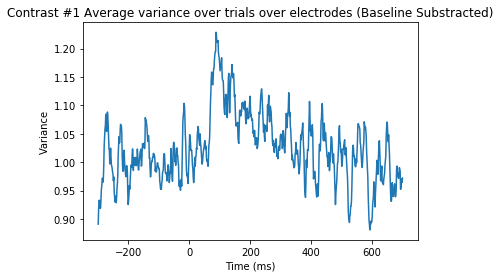

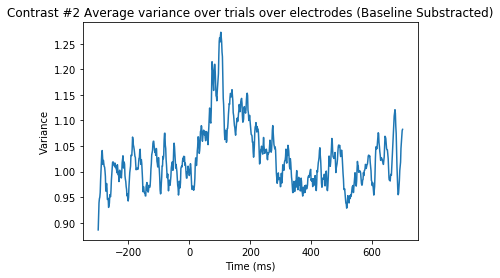

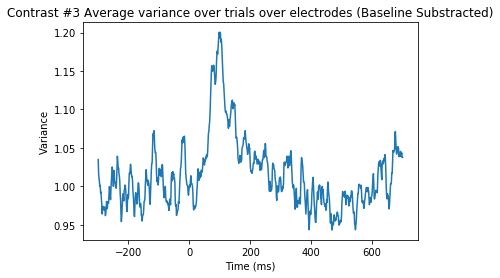

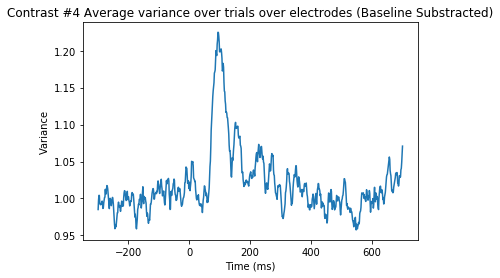

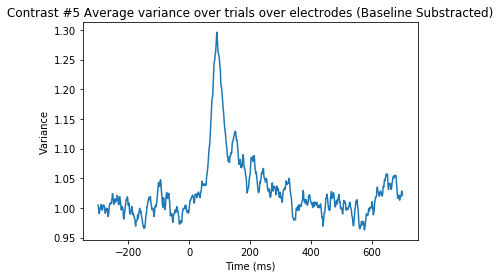

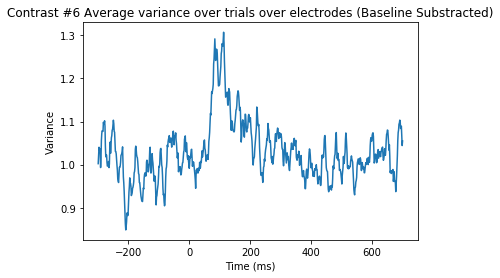

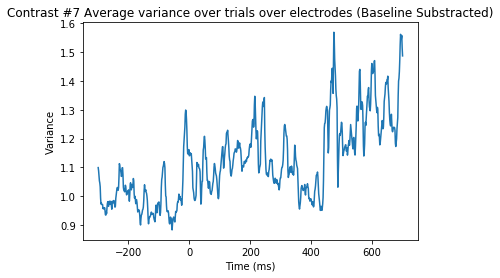

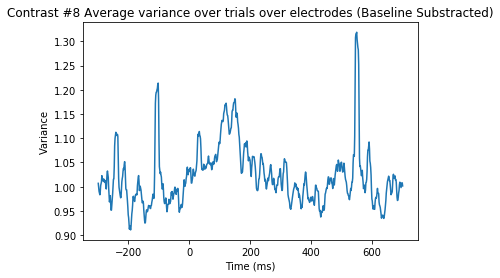

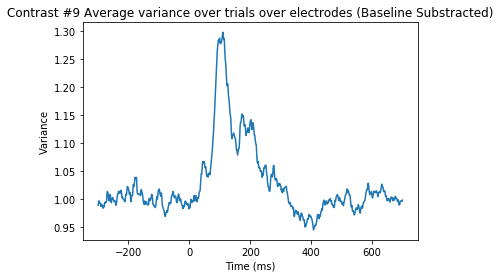

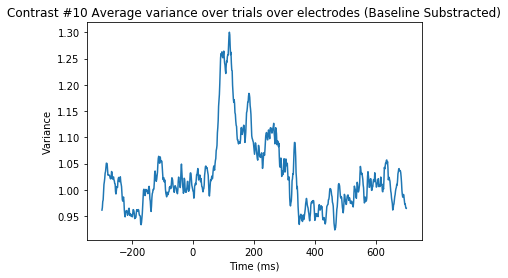

In [6]:
#################################################################################################
## Multiple session exploration
## Data for all V1 sessions have been loaded here


## Plotting the first 10 contrast value
for i in range(10):
    title= "Contrast #" + str(i+1) + " Average variance over trials over electrodes (Baseline Substracted)"
    sm.plot_figure_5("seen",i,ao_channels=True,smooth=10,baseline=True,title=title,ylabel="Variance")


(839, 1)
Warning, data shape unexpected
(839, 1)
Warning, data shape unexpected
(839, 1)
Warning, data shape unexpected
(839, 1)
Warning, data shape unexpected


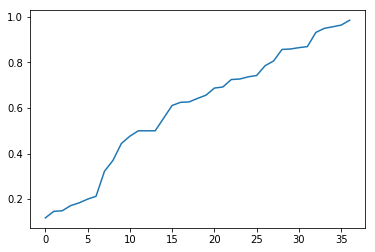

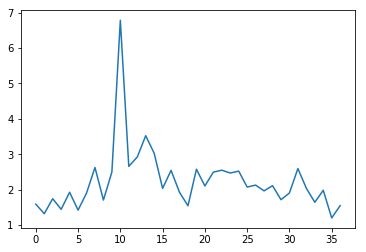

In [31]:
#################################################################################################
## Multiple session exploration
## Data for all V1 sessions have been loaded here

sm = MultipleSessions("dlPFC",normalized=True,monkey='J')

l = []
k = []
## Plotting the first 10 contrast value
for i in range(len(sm.get_data("contrast"))):
    title= "Contrast #" + str(i+1) + " Average variance over trials over electrodes (Baseline Substracted)"

    d1 = sm.get_data("missed")[i]
    d2 = sm.get_data("seen")[i]
    d = np.concatenate((d1,d2),2)
    final_data = np.nanstd(d,2)
    electrode_baseline = np.nanmean(final_data[0:sm.stimulus_offset],0)
    final_data = final_data/electrode_baseline
    final_data = np.nanmean(final_data,1)
    l.append(np.clip(np.max(final_data[228:628]),-10,10))
    k.append(sm.get_data("contrast_performance")[i])

u, o = (list(t) for t in zip(*sorted(zip(k, l))))
plt.plot(u)
plt.show()
plt.plot(o)
plt.show()



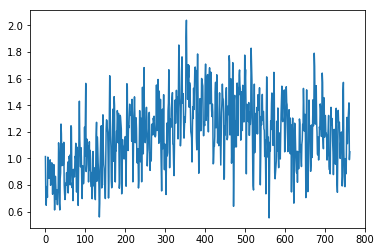

In [29]:
plt.plot(final_data)

In [30]:
a = sm.get_data("seen")[i]
b = sm.get_data("missed")[i]
c = np.concatenate((a,b),2)

c.shape


(763, 8, 8)